# Statistical models in R
This notebook is covering:
1. VECM

In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

In [8]:
# rpy2 is a Python package that allows you to run R code from Python
%pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Load the rpy2 extension to use R in Jupyter
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


The magic function `%%R` is used for running R code in Jupyter

In [10]:
%%R
source("tvecm.r")
hub1_name <- "the"
hub2_name <- "nbp"
validation_size <- 250
test_size <- 250
window_size <- 5
nthresh <- 2

[1] "Starting ttf the 1 5"


981 (4.9%) points of the grid lead to regimes with percentage of observations < trim and were not computed
981 (4.9%) points of the grid lead to regimes with percentage of observations < trim and were not computed
981 (4.9%) points of the grid lead to regimes with percentage of observations < trim and were not computed
981 (4.9%) points of the grid lead to regimes with percentage of observations < trim and were not computed
247 (1.2%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1005 (5%) points of the grid lead to regimes with percentage of observations < trim and were not computed
250 (1.3%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1032 (5.2%) points of the grid lead to regimes with percentage of observations < trim and were not computed
1010 (5.1%) points of the grid lead to regimes with percentage of observations < trim and were not computed
208 (1%) points of the grid lead to 

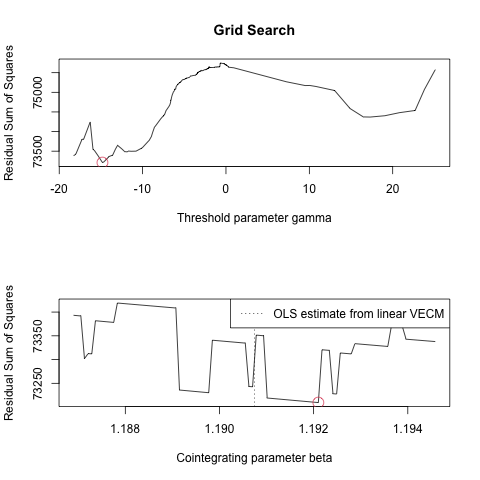

In [11]:
%%R
pairs <- list(c("ttf", "the"), 
        c("ttf", "nbp"), 
        c("the", "nbp")
)
nthreshs <- c(1,2)
window_sizes <- c(5, 10)
for (i in 1:length(pairs)) {
    for (j in 1:length(nthreshs)) {
        for(k in 1:length(window_sizes)) {

            tryCatch({
                pair <- pairs[[i]]
                hub1_name <- pair[1]
                hub2_name <- pair[2]
                nthresh <- nthreshs[j]
                window_size <- window_sizes[k]
                print(paste("Starting", hub1_name, hub2_name, nthresh, window_size))
                tvecm_system(hub1_name, hub2_name, validation_size=validation_size, test_size=test_size, window_size=window_size, nthresh=nthresh, verbose=FALSE, save=TRUE)
                print(paste("Finished", hub1_name, hub2_name, nthresh, window_size))
            }, error = function(e) {
                print(paste("Error", hub1_name, hub2_name, nthresh, window_size))
            })
        }
    }
}

222 (1.1%) points of the grid lead to regimes with percentage of observations < trim and were not computed
Best threshold from first search 0.6777 
Best cointegrating value 0.9971808 
Second best (conditionnal on the first one) 0.6777 -0.0113 	 SSR 54007.08 
There were  6  thresholds values which minimize the SSR in the iterative step, the first one was taken
Second step best thresholds -0.0113 0.6763 			 SSR 54007.08 
499 (2.5%) points of the grid lead to regimes with percentage of observations < trim and were not computed
Best threshold from first search 0.0426 
Best cointegrating value 0.9827888 
There were  4  thresholds values which minimize the SSR in the conditional step, the first one was taken
Second best (conditionnal on the first one) 0.0426 0.0698 	 SSR 216.3217 
There were  8  thresholds values which minimize the SSR in the iterative step, the first one was taken
Second step best thresholds 0.0426 0.0698 			 SSR 216.3217 
$predictions
             hub1      hub2
1046    16

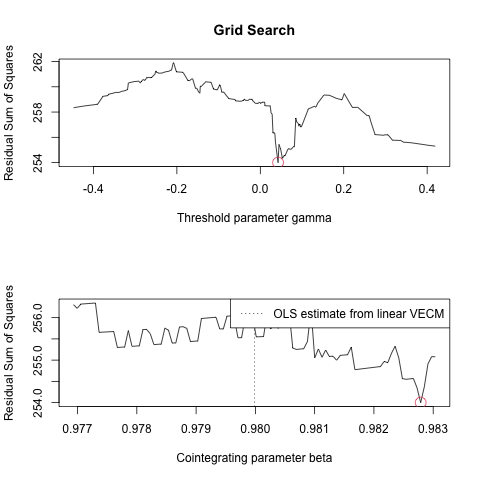

In [12]:
%%R
tvecm_system("ttf", "the", validation_size=500, test_size=500, window_size=2, lags=5, nthresh=2, verbose=FALSE, save=TRUE)

215 (1.1%) points of the grid lead to regimes with percentage of observations < trim and were not computed
#############
###Model TVECM
#############
Full sample size: 1285 	End sample size: 1279
Number of variables: 2 	Number of estimated parameters 48
AIC 2069.383 	BIC 2321.921 	SSR 76204.3 


Cointegrating vector: (1, - 0.9951991 )
$Bdown
              ECT             Const           hub1 t -1       hub2 t -1       
Equation hub1 0.6055(0.2222)  0.1371(0.4836)  0.6100(0.2775)  -0.5244(0.3534) 
Equation hub2 0.7248(0.1409)  0.1432(0.4608)  1.0791(0.0529). -0.9907(0.0774).
              hub1 t -2         hub2 t -2        hub1 t -3         
Equation hub1 -1.5790(0.0045)** 1.5295(0.0059)** -1.8623(0.0005)***
Equation hub2 -1.2764(0.0205)*  1.2292(0.0256)*  -1.5656(0.0033)** 
              hub2 t -3        hub1 t -4        hub2 t -4       
Equation hub1 1.7599(0.0011)** -0.1564(0.7660)  0.2461(0.6406)  
Equation hub2 1.4681(0.0059)** 0.1189(0.8196)   -0.0283(0.9569) 
              hub1 t

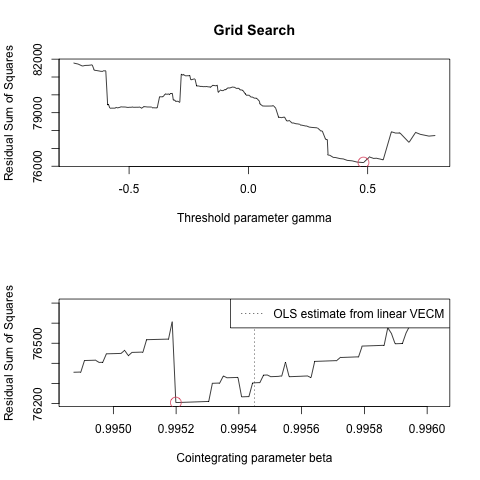

In [13]:
%%R
training_model <- tvecm_training_model("ttf", "the", 250, window_size, lag=5)
summary(training_model)

In [14]:
%%R
hub1_predictions <- vecm_output$predictions$hub1
hub1_actuals <- vecm_output$actuals$hub1
hub2_predictions <- vecm_output$predictions$hub2
hub2_actuals <- vecm_output$actuals$hub2


Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'vecm_output' not found


RInterpreterError: Failed to parse and evaluate line 'hub1_predictions <- vecm_output$predictions$hub1\nhub1_actuals <- vecm_output$actuals$hub1\nhub2_predictions <- vecm_output$predictions$hub2\nhub2_actuals <- vecm_output$actuals$hub2\n'.
R error message: "Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  object 'vecm_output' not found"

In [57]:
%%R
hub1_forecast_comparison <- data.frame(
  Actual = hub1_actuals,
  Forecasted = hub1_predictions
)

In [58]:
%R -o hub1_forecast_comparison
%R -o hub1_name

hub1_forecast_comparison = hub1_forecast_comparison

actual_trace = go.Scatter(
    x=hub1_forecast_comparison.index,
    y=hub1_forecast_comparison['Actual'],
    mode='lines',
    name='Actual Prices'
)

forecasted_trace = go.Scatter(
    x=hub1_forecast_comparison.index,
    y=hub1_forecast_comparison['Forecasted'],
    mode='lines',
    name='Forecasted Prices'
)

# Create the plot
layout = go.Layout(
    title= hub1_name.item() + ': VECM Actual vs Forecasted Prices',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Price'),
)

fig = go.Figure(data=[actual_trace, forecasted_trace], layout=layout)
fig.show()


In [59]:
%%R
hub2_forecast_comparison <- data.frame(
  Actual = hub2_actuals,
  Forecasted = hub2_predictions
)

In [60]:
%R -o hub2_forecast_comparison
%R -o hub2_name

hub2_forecast_comparison = hub2_forecast_comparison

actual_trace = go.Scatter(
    x=hub2_forecast_comparison.index,
    y=hub2_forecast_comparison['Actual'],
    mode='lines',
    name='Actual Prices'
)

forecasted_trace = go.Scatter(
    x=hub2_forecast_comparison.index,
    y=hub2_forecast_comparison['Forecasted'],
    mode='lines',
    name='Forecasted Prices'
)

# Create the plot
layout = go.Layout(
    title= hub2_name.item() + ': VECM Actual vs Forecasted Prices',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Price'),
)

fig = go.Figure(data=[actual_trace, forecasted_trace], layout=layout)
fig.show()
